In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# Define a custom converter function to handle percentage values
def percent_to_float(x):
    return float(x.strip('%')) / 100

# Define the columns that need to be converted using the custom function
percent_columns = ['I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate', 'Overall cache miss rate', 'Data cache miss rate', 'Weighted Miss Rate']

# Create a dictionary for converters
converters = {col: percent_to_float for col in percent_columns}

# Read the CSV data using pandas
data = pd.read_csv("get_experiment_azure.csv", thousands=',', converters=converters)
data

,Policy,Total commands,Sliding Window Time,Sliding Window Throughput,Sliding Window I/O,Overall Time,Overall Throughput,Overall I/O,I refs,I1 misses,...,D1 misses,LLD misses,D1 miss rate,LLd miss rate,LL refs,LL misses,LL miss rate,Overall cache miss rate,Data cache miss rate,Weighted Miss Rate
0,Tiered,2000000,291.69,6856.52,482175,291.69,6856.52,482175,22856629986,232764599,...,60360627,2578631,0.005,0.0,293125226,2583630,0.0,0.0087,0.0055,0.0085
1,Tiered,4000000,439.02,4555.65,763378,730.71,5474.14,1245553,57116906231,578072255,...,149725809,5555975,0.005,0.0,727798064,5561296,0.0,0.0086,0.0054,0.0084
2,Tiered,6000000,517.74,3862.94,805435,1248.45,4805.96,2050988,100233992491,936753359,...,277567602,7933325,0.006,0.0,1214320961,7940243,0.0,0.0082,0.0057,0.0082
3,Tiered,8000000,464.27,4307.80,800228,1712.72,4670.92,2851216,135741528946,1301504117,...,408228195,13021151,0.006,0.0,1709732312,13028679,0.0,0.0085,0.0062,0.0084
4,Tiered,10000000,566.12,3532.83,834943,2278.84,4388.19,3686159,181420274847,1672547038,...,587707224,14351832,0.007,0.0,2260254262,14359673,0.0,0.0084,0.0067,0.0085
5,Leveled,2000000,282.75,7073.31,478206,282.75,7073.31,478206,22657306851,240351044,...,67456585,2968357,0.006,0.0,307807629,2973744,0.0,0.0092,0.0063,0.0091
6,Leveled,4000000,381.24,5246.11,737869,663.99,6024.20,1216075,53831404804,593618246,...,184966494,7984514,0.007,0.0,778584740,7992832,0.0,0.0099,0.0074,0.0097
7,Leveled,6000000,413.66,4834.90,763681,1077.65,5567.69,1979756,89331926135,958323997,...,340691172,13504421,0.008,0.0,1299015169,13517891,0.0,0.0100,0.0083,0.0099
8,Leveled,8000000,422.52,4733.52,783828,1500.17,5332.74,2763584,122441293676,1329331313,...,473163556,19740744,0.008,0.0,1802494869,19756242,0.0,0.0101,0.0084,0.0100
9,Leveled,10000000,444.72,4497.19,787455,1944.89,5141.68,3551039,159282572372,1665836184,...,657852812,24346242,0.009,0.0,2323688996,24365907,0.0,0.0100,0.0090,0.0100


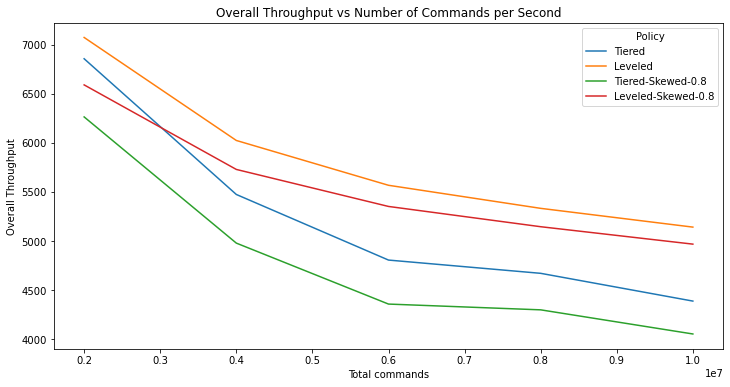

In [2]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Total commands", y="Overall Throughput", hue="Policy", palette="tab10")
plt.title("Overall Throughput vs Number of Commands per Second")
plt.legend(title="Policy")
plt.show()

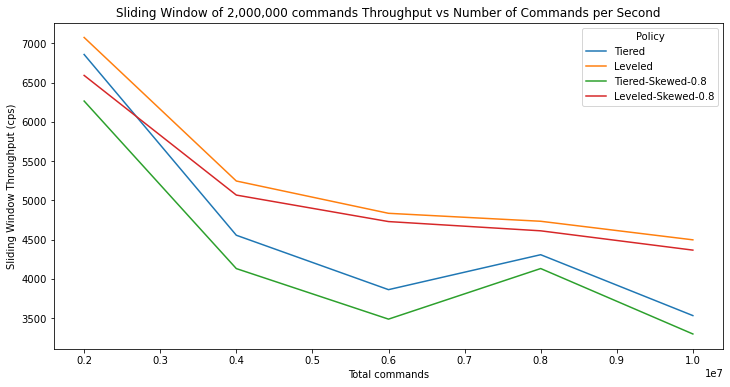

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Total commands", y="Sliding Window Throughput", hue="Policy", palette="tab10")
plt.title("Sliding Window of 2,000,000 commands Throughput vs Number of Commands per Second")
plt.ylabel("Sliding Window Throughput (cps)")
plt.legend(title="Policy")
plt.show()


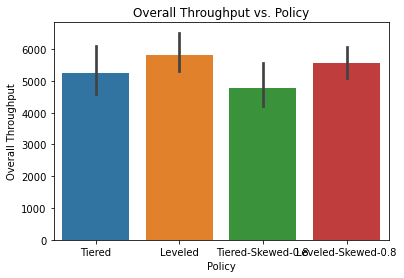

In [4]:
sns.barplot(x='Policy', y='Overall Throughput', data=data)
plt.title('Overall Throughput vs. Policy')
plt.show()


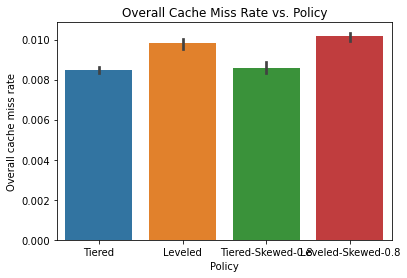

In [5]:
sns.barplot(x='Policy', y='Overall cache miss rate', data=data)
plt.title('Overall Cache Miss Rate vs. Policy')
plt.show()


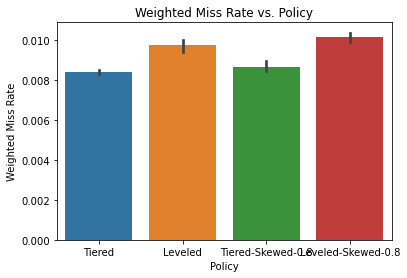

In [6]:
sns.barplot(x='Policy', y='Weighted Miss Rate', data=data)
plt.title('Weighted Miss Rate vs. Policy')
plt.show()


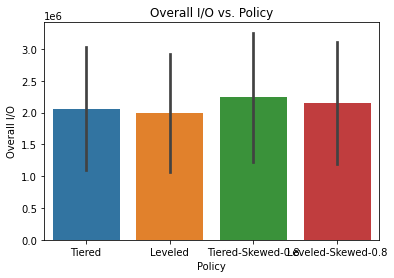

In [7]:
sns.barplot(x='Policy', y='Overall I/O', data=data)
plt.title('Overall I/O vs. Policy')
plt.show()


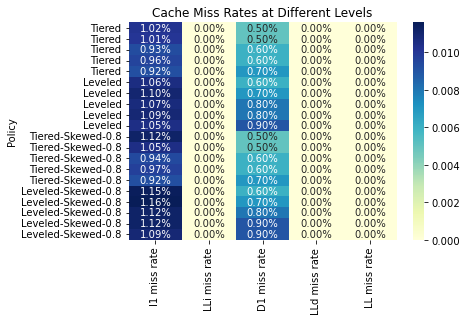

In [8]:
# Prepare data for heatmap
heatmap_data = data[['Policy', 'I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate']]
heatmap_data = heatmap_data.set_index('Policy')

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title('Cache Miss Rates at Different Levels')
plt.show()


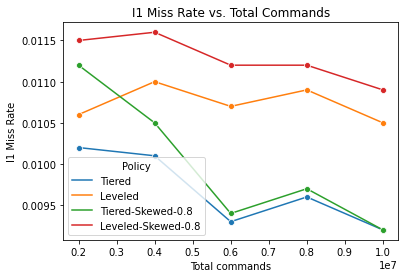

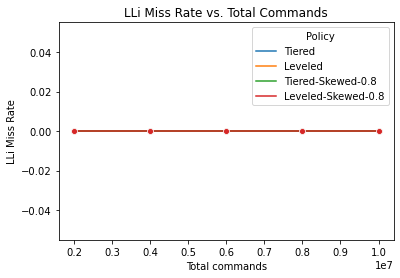

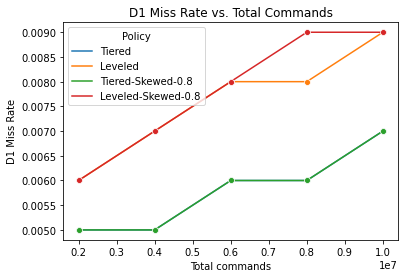

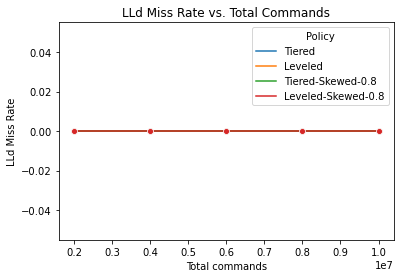

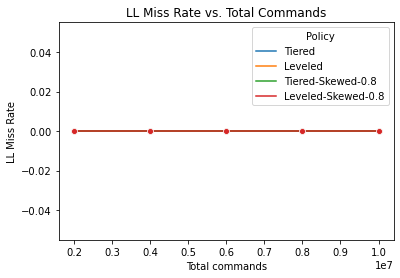

In [9]:
import matplotlib.pyplot as plt

# Prepare data for line plots
line_data = data[['Total commands', 'Policy', 'I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate']]

# Plot I1 miss rate
sns.lineplot(data=line_data, x='Total commands', y='I1 miss rate', hue='Policy', marker='o')
plt.title('I1 Miss Rate vs. Total Commands')
plt.ylabel('I1 Miss Rate')
plt.show()

# Plot LLi miss rate
sns.lineplot(data=line_data, x='Total commands', y='LLi miss rate', hue='Policy', marker='o')
plt.title('LLi Miss Rate vs. Total Commands')
plt.ylabel('LLi Miss Rate')
plt.show()

# Plot D1 miss rate
sns.lineplot(data=line_data, x='Total commands', y='D1 miss rate', hue='Policy', marker='o')
plt.title('D1 Miss Rate vs. Total Commands')
plt.ylabel('D1 Miss Rate')
plt.show()

# Plot LLd miss rate
sns.lineplot(data=line_data, x='Total commands', y='LLd miss rate', hue='Policy', marker='o')
plt.title('LLd Miss Rate vs. Total Commands')
plt.ylabel('LLd Miss Rate')
plt.show()

# Plot LL miss rate
sns.lineplot(data=line_data, x='Total commands', y='LL miss rate', hue='Policy', marker='o')
plt.title('LL Miss Rate vs. Total Commands')
plt.ylabel('LL Miss Rate')
plt.show()

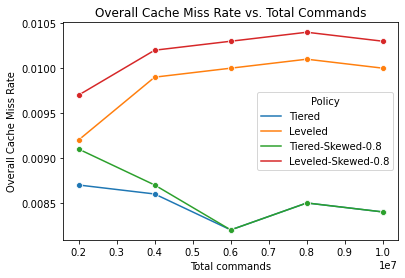

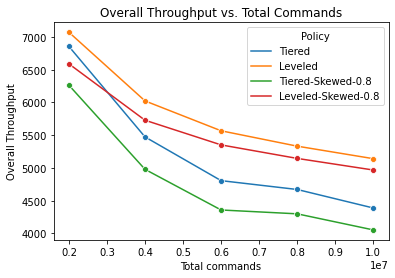

In [10]:
import matplotlib.pyplot as plt

# Prepare data for line plots
line_data_overall = data[['Total commands', 'Policy', 'Overall cache miss rate', 'Overall Throughput']]

# Plot Overall Cache Miss Rate
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall cache miss rate', hue='Policy', marker='o')
plt.title('Overall Cache Miss Rate vs. Total Commands')
plt.ylabel('Overall Cache Miss Rate')
plt.show()

# Plot Overall Throughput
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall Throughput', hue='Policy', marker='o')
plt.title('Overall Throughput vs. Total Commands')
plt.ylabel('Overall Throughput')
plt.show()

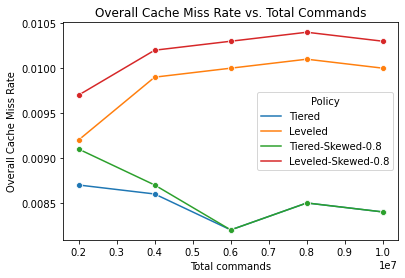

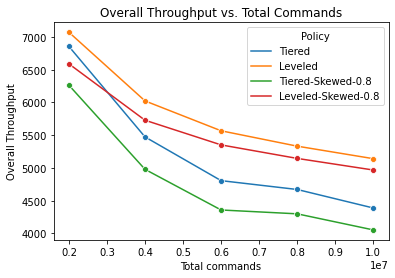

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# Define a custom converter function to handle percentage values
def percent_to_float(x):
    return float(x.strip('%')) / 100

# Define the columns that need to be converted using the custom function
percent_columns = ['I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate', 'Overall cache miss rate', 'Data cache miss rate', 'Weighted Miss Rate']

# Create a dictionary for converters
converters = {col: percent_to_float for col in percent_columns}

# Read the CSV data using pandas
data = pd.read_csv("get_experiment_azure.csv", thousands=',', converters=converters)


# Prepare data for line plots
line_data_overall = data[['Total commands', 'Policy', 'Overall cache miss rate', 'Overall Throughput']]

# Plot Overall Cache Miss Rate
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall cache miss rate', hue='Policy', marker='o')
plt.title('Overall Cache Miss Rate vs. Total Commands')
plt.ylabel('Overall Cache Miss Rate')
plt.show()

# Plot Overall Throughput
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall Throughput', hue='Policy', marker='o')
plt.title('Overall Throughput vs. Total Commands')
plt.ylabel('Overall Throughput')
plt.show()


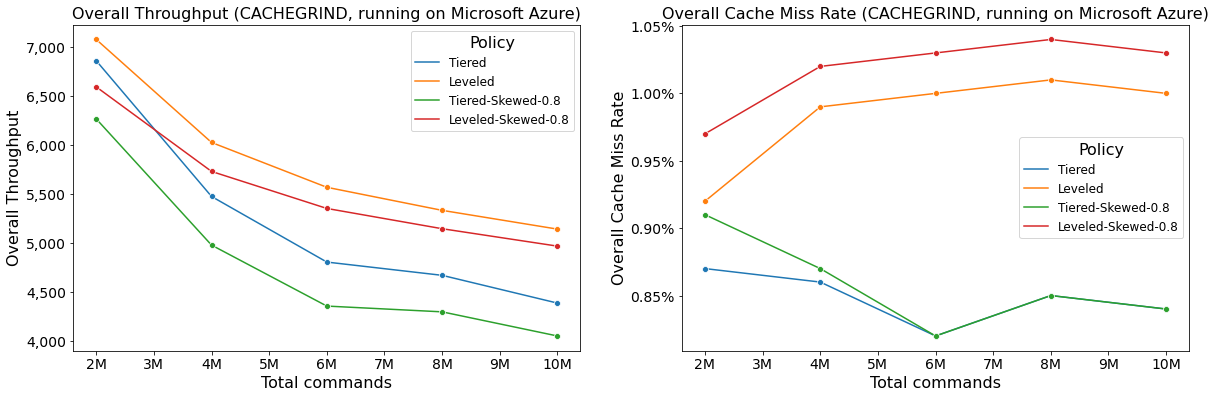

In [15]:
# Prepare data for line plots
line_data_overall = data[['Total commands', 'Policy', 'Overall cache miss rate', 'Overall Throughput']]

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

def millions_formatter(x, pos):
    return '{:.0f}M'.format(x * 1e-6)

# Plot Overall Throughput
sns.lineplot(ax=axes[0], data=line_data_overall, x='Total commands', y='Overall Throughput', hue='Policy', marker='o')
axes[0].set_title('Overall Throughput (CACHEGRIND, running on Microsoft Azure)')
axes[0].set_ylabel('Overall Throughput')

# Format x-axis and y-axis without scientific notation and with commas
axes[0].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Plot Overall Cache Miss Rate
sns.lineplot(ax=axes[1], data=line_data_overall, x='Total commands', y='Overall cache miss rate', hue='Policy', marker='o')
axes[1].set_title('Overall Cache Miss Rate (CACHEGRIND, running on Microsoft Azure)')
axes[1].set_ylabel('Overall Cache Miss Rate')

# Format x-axis and y-axis without scientific notation and with commas
axes[1].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: '{:.2%}'.format(x)))


plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'axes.titlesize': 16, 'legend.fontsize': 12})

plt.show()
